# 0.0 Imports

In [1]:
import pandas as pd
import inflection
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.display import HTML
from IPython.display import Image

# 1.0 DESCRICAO DOS DADOS

## 0.1 Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [3]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


0.1 Helper Functioons

## 0.2 Loading data

In [4]:
df_sales_raw = pd.read_csv('./data/train.csv', low_memory=False)
df_store_raw = pd.read_csv('./data/store.csv', low_memory=False)

#df_raw = pd.concat([df_sales_raw, df_store_raw]) - juntando dois datasets

df_raw = pd.merge(df_sales_raw, df_store_raw, how = 'left', on = 'Store')

In [5]:
df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
186756,552,6,2015-02-14,4734,472,1,0,0,0,a,a,4260.0,7.0,2008.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct"


## 1.0 Descrição dos dados

In [6]:
df1 = df_raw.copy()

1.1 Rename Columns

In [7]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [8]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

# rename dados da lista de kamokase para snakecase


snakecase = lambda x: inflection.underscore(x)

cols_new = list(map ( snakecase, cols_old ) )

df1.columns = cols_new

In [9]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2 Dimensão do Dataset

In [10]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))

Number of Rows: 1017209
Number of Cols: 18


## 1.3 Tipo de dados

In [11]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check NA

In [12]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Limpando os NA

In [13]:
#competition_distance
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)


#competition_open_since_month
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x ['competition_open_since_month'], axis=1)

#competition_open_year
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan (x['competition_open_since_year']) else x ['competition_open_since_year'], axis=1 )


#promo2_since_week
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan (x['promo2_since_week']) else x['promo2_since_week'], axis=1)


#promo2_since_year
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan (x['promo2_since_year']) else x['promo2_since_year'], axis=1)


#promo_interval
month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'} 

df1['promo_interval'].fillna(0, inplace=True)

df1['month_map'] = df1['date'].dt.month.map(month_map)


df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)


In [14]:
df1.sample(15).T

,911391,211335,914281,725928,387264,370061,885432,461706,312010,655687,319488,176395,779195,694403,434965
store,107,601,767,849,416,1086,908,882,992,853,990,226,596,544,901
day_of_week,5,5,3,4,3,1,1,3,7,4,6,1,5,4,6
date,2013-04-05 00:00:00,2015-01-23 00:00:00,2013-04-03 00:00:00,2013-09-19 00:00:00,2014-07-23 00:00:00,2014-08-11 00:00:00,2013-04-29 00:00:00,2014-05-14 00:00:00,2014-10-12 00:00:00,2013-11-21 00:00:00,2014-10-04 00:00:00,2015-02-23 00:00:00,2013-08-02 00:00:00,2013-10-17 00:00:00,2014-06-07 00:00:00
sales,6266,3889,4414,5393,7756,5728,6086,5380,0,9137,7031,5837,4581,11859,5536
customers,883,340,555,700,1094,759,458,754,0,974,677,616,763,1716,503
open,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
promo,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
state_holiday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
school_holiday,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0
store_type,a,d,a,c,a,a,a,a,a,a,d,a,c,a,a


In [15]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6 Change Types

In [16]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [17]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype('int64')
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype('int64')

df1['promo2_since_week'] = df1['promo2_since_week'].astype('int64')
df1['promo2_since_year'] = df1['promo2_since_year'].astype('int64')


## 1.7 Descriptive Statistical

In [18]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attibutes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

In [19]:
#num_attributes.sample(2)
#cat_attibutes.sample(2)

## 1.7 Numerical Attributes

In [20]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(np.min)).T
d3 = pd.DataFrame(num_attributes.apply(np.max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = (['attributes', 'min', 'max', 'range', 'mean', 'midian', 'std', 'skew', 'kurtosis'])

m

,attributes,min,max,range,mean,midian,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


C:\Users\roxfr\anaconda3\envs\ds_em_producao\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

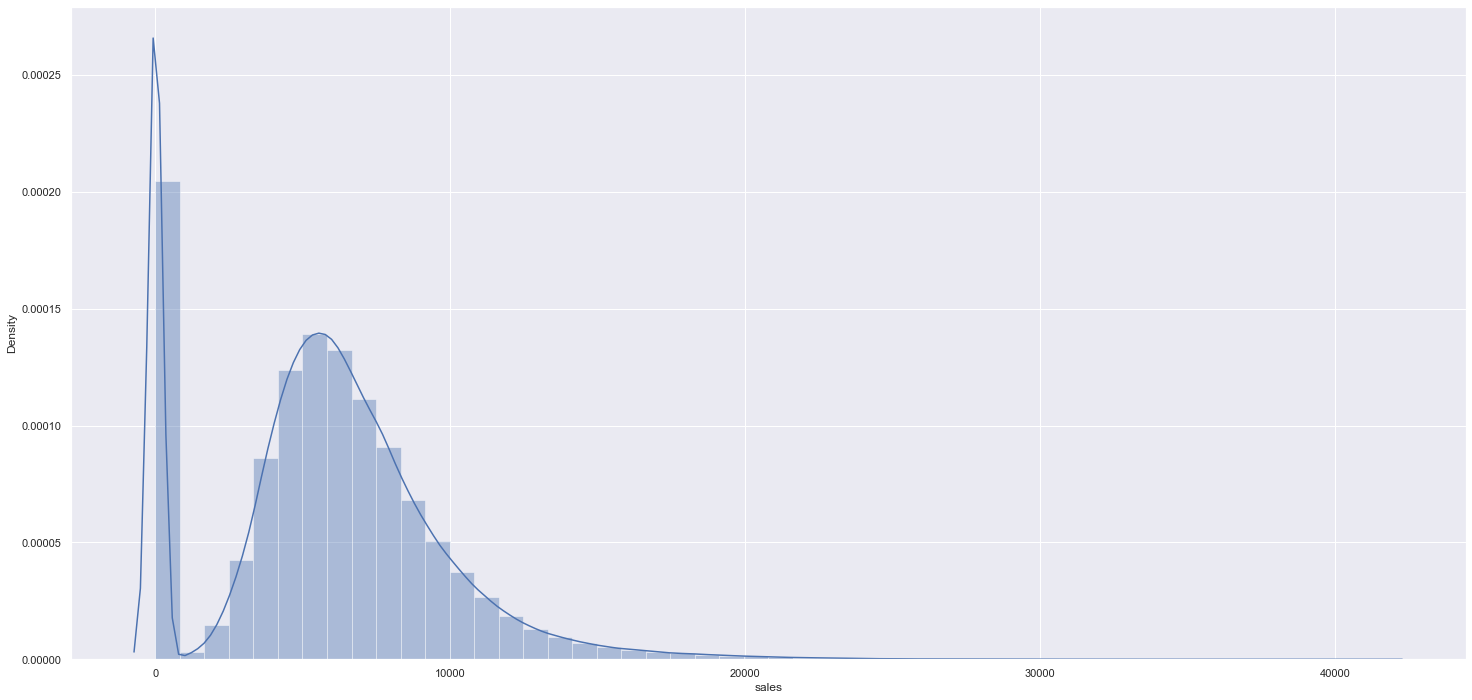

In [21]:
sns.distplot(df1['sales'])

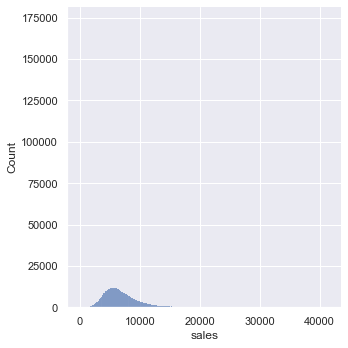

In [22]:
sns.displot(df1['sales'])

C:\Users\roxfr\anaconda3\envs\ds_em_producao\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='competition_distance', ylabel='Density'>

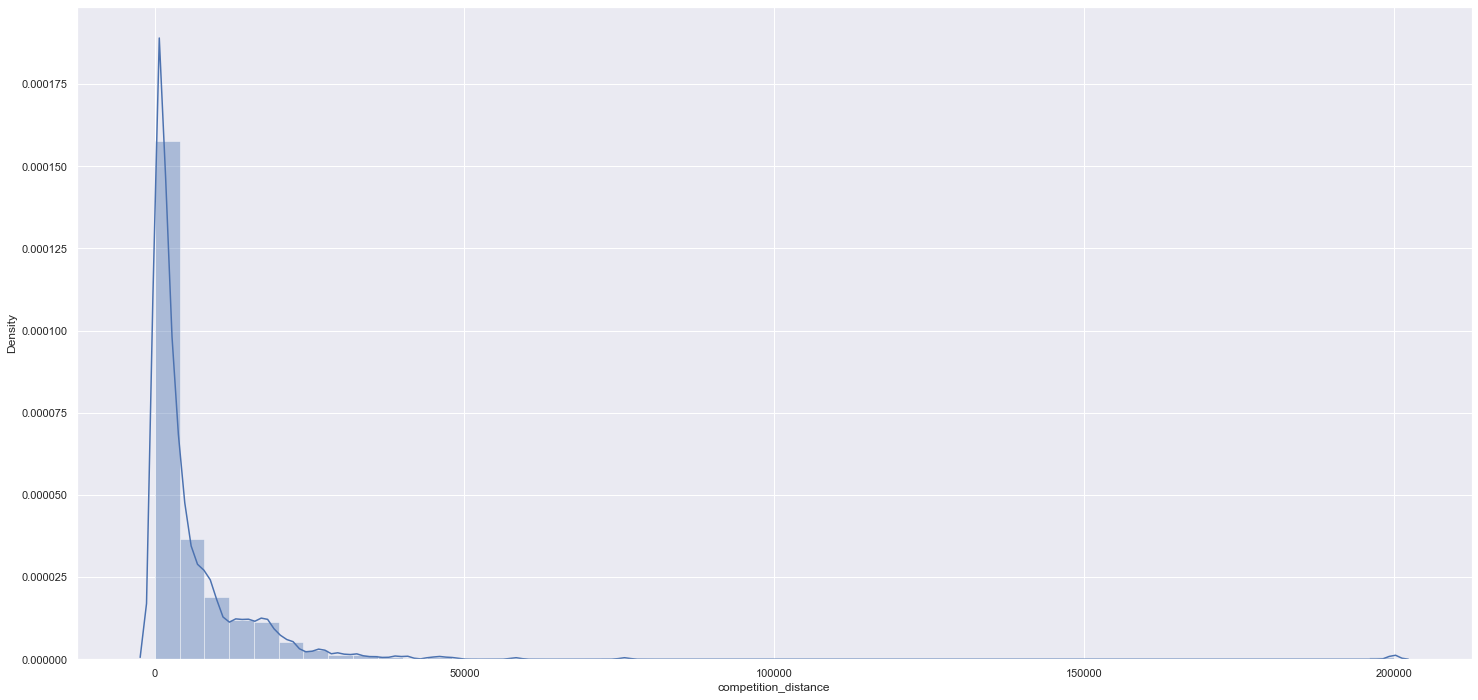

In [23]:
sns.distplot(df1['competition_distance'])

In [24]:
cat_attibutes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

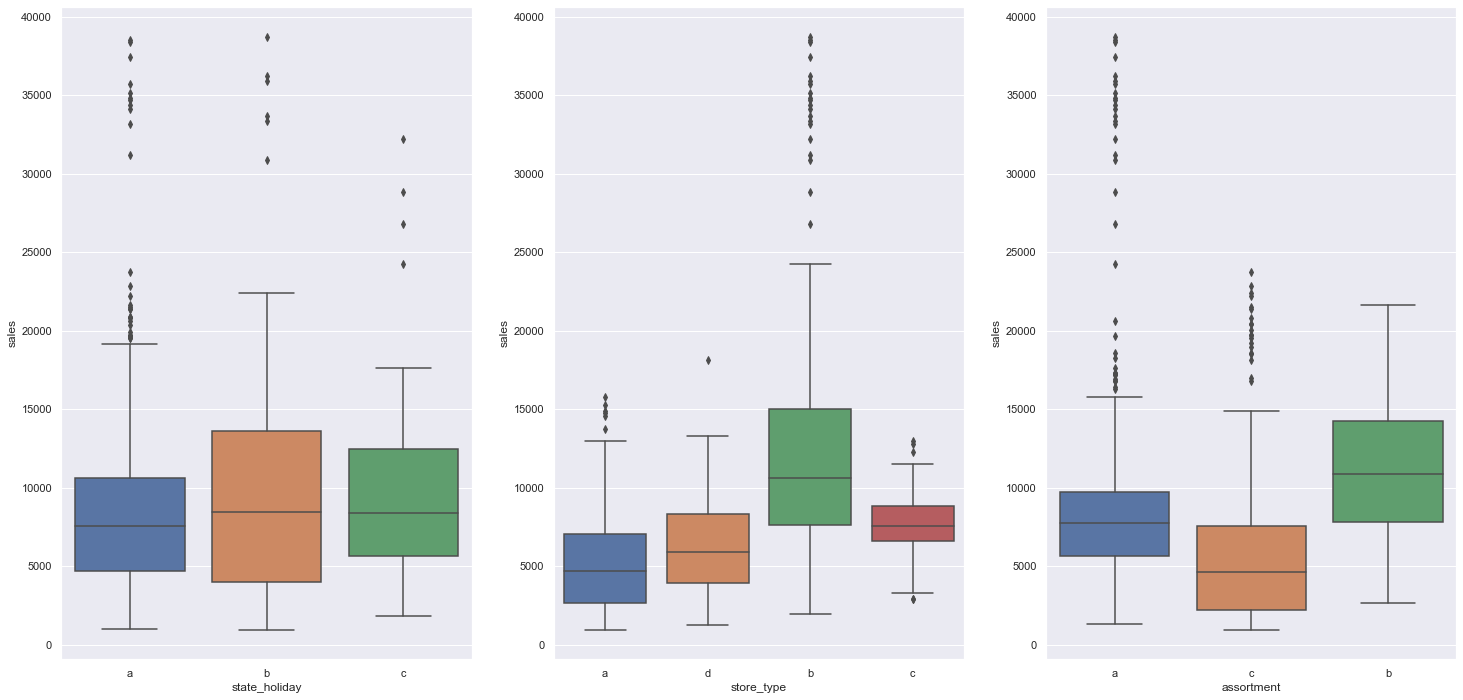

In [25]:
aux1 = df1[(df1['state_holiday'] !='0') & (df1['sales'] > 0)]

plt.subplot(1, 3, 1)
sns.boxplot(x='state_holiday', y='sales', data=aux1)

plt.subplot(1, 3, 2)
sns.boxplot(x='store_type', y='sales', data=aux1)

plt.subplot(1, 3, 3)
sns.boxplot(x='assortment', y='sales', data=aux1)

# 2.0 PASSO 02 - FEATURE ENGINEERING

In [26]:
df2 = df1.copy()

## Mapa Menta de Hipóteses

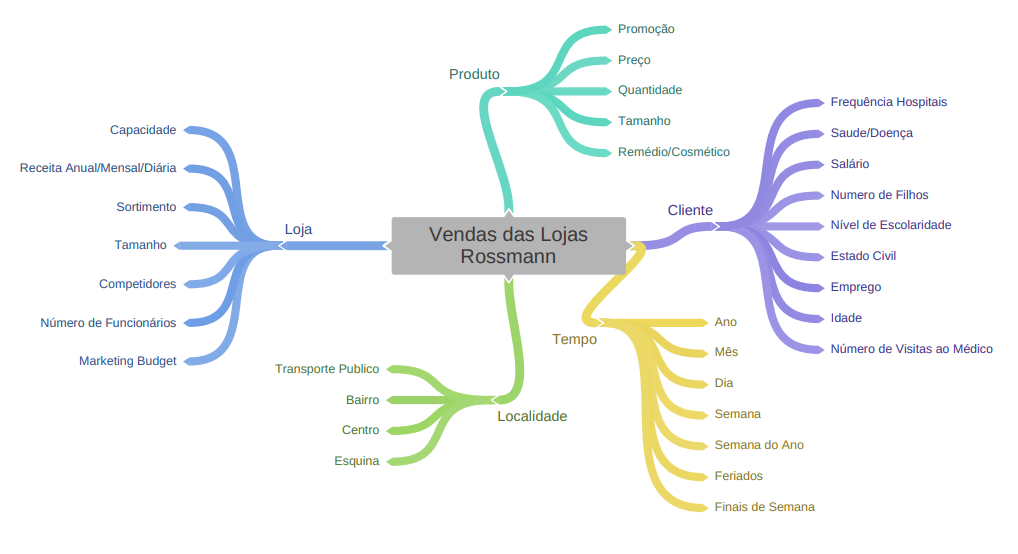

In [27]:
Image ('./img/attributes_hipotese.png')

## 2.1 Criação de Hipoteses

### 2.1.1 Hipoteses Lojas

    **1.** Lojas com maior quadro de funcionários deveriam vender mais.

    **2.** Lojas com maior capacidade de estoque deveriam vender mais.

    **3.** Lojas com maior porte deveriam vender mais.

    **4.** Lojas com maior sortimento deveriam vender mais.

    **5.** Lojas com competidores mais próximos deveriam vender menos.

    **6.** Lojas com competidores à mais tempo deveria vender mais.

### 2.1.2 Hipoteses Produto

    **1.** Lojas que investem mais em Marketing deveriam vender mais.
    
    **2.** Lojas que expoe mais o produto nas vitrines deveriam vender mais.

    **3.** Lojas que tem preços menores nos produtos deveriam vender mais.

    **4.** Lojas que tem preços menores por mais tempo nos produtos deveriam vender mais.

    **5.** Lojas com promoções mais agressivas (descontos maiores), deveriam vender mais.

    **6.** Lojas com promoções ativas por mais tempo deveriam vender mais.

    **7.** Lojas com mais dias de promoções deveriam vender mais.

    **8.*** Lojas com mais promoções consecutivas deveriam vender mais.

### 2.1. Hipoteses Tempo

    **1.** Lojas abertas durante o feriado de Natal deveriam vender mais.

    **2.** Lojas deveriam vender mais ao longo dos anos.

    **3.** Lojas deveriam vender mais no segundo semestre do ano.

    **4.** Lojas deveriam vender mais depois do dia 10 de cada mês.

    **5.** Lojas deveriam vender menos aos finais de semana.

    **6.** Lojas deveriam vender menos durante os feriados escolares.

### 2.2. Lista Final de Hipóteses

#### priorizando a lista com base nos dados que eu tenho disponível no dataset.

    **1.** Lojas com maior sortimento deveriam vender mais.

    **2.** Lojas com competidores mais próximos deveriam vender menos.

    **3.** Lojas com competidores à mais tempo deveria vender mais.

    **4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

    **5.** Lojas com mais dias de promoções deveriam vender mais.

    **6.*** Lojas com mais promoções consecutivas deveriam vender mais.
    
    **7.** Lojas abertas durante o feriado de Natal deveriam vender mais.

    **8.** Lojas deveriam vender mais ao longo dos anos.

    **9.** Lojas deveriam vender mais no segundo semestre do ano.

    **10.** Lojas deveriam vender mais depois do dia 10 de cada mês.

    **11.** Lojas deveriam vender menos aos finais de semana.

    **12.** Lojas deveriam vender menos durante os feriados escolares.

## 2.3 Feature Enginnering

In [28]:
# derivações

# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2.date.dt.strftime('%W')

# year week
df2['year_week'] = df2.date.dt.strftime('%Y-%W')

# competition since
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'], month=x['competition_open_since_month'], day=1), axis=1)
df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/30).apply(lambda x: x.days).astype(int)

# promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days=7))
df2['promo_time_week'] = ((df2['date'] - df2['promo_since'])/7).apply(lambda x: x.days).astype(int)


# assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended' )

# state holiday
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day' )


In [29]:
df2.tail(20).T

,1017189,1017190,1017191,1017192,1017193,1017194,1017195,1017196,1017197,1017198,1017199,1017200,1017201,1017202,1017203,1017204,1017205,1017206,1017207,1017208
store,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115
day_of_week,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
date,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00
sales,0,5961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
customers,0,1405,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
open,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
promo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
state_holiday,public_holiday,public_holiday,public_holiday,public_holiday,public_holiday,public_holiday,public_holiday,public_holiday,public_holiday,public_holiday,public_holiday,public_holiday,public_holiday,public_holiday,public_holiday,public_holiday,public_holiday,public_holiday,public_holiday,public_holiday
school_holiday,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
store_type,a,b,a,a,a,d,a,d,d,c,a,a,a,c,c,a,c,a,a,d


## 3.0 PASSO 03 - Filtragem de Variáveis

In [30]:
df3 = df2.copy()

### 3.1 Filtragem das Linhas

In [31]:
df3 = df3[(['open'] != 0) & (df3['sales'] > 0)]

### 3.2 Seleção das Colunas

In [32]:
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
df3 = df3.drop(cols_drop, axis=1)

In [33]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

# 4.0 Passo 04 - Análise Exploratório dos dados

In [34]:
df4 = df3.copy()

## 4.1 Analise Univariada

### 4.1.1 Response Variable

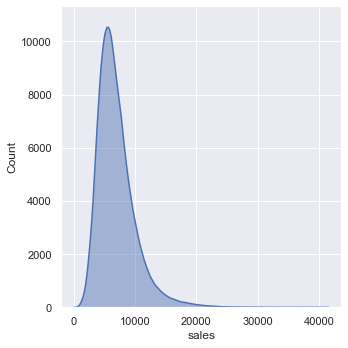

In [37]:
sns.displot(df4['sales'], kde=True)

### 4.1.2 Numerical Variable

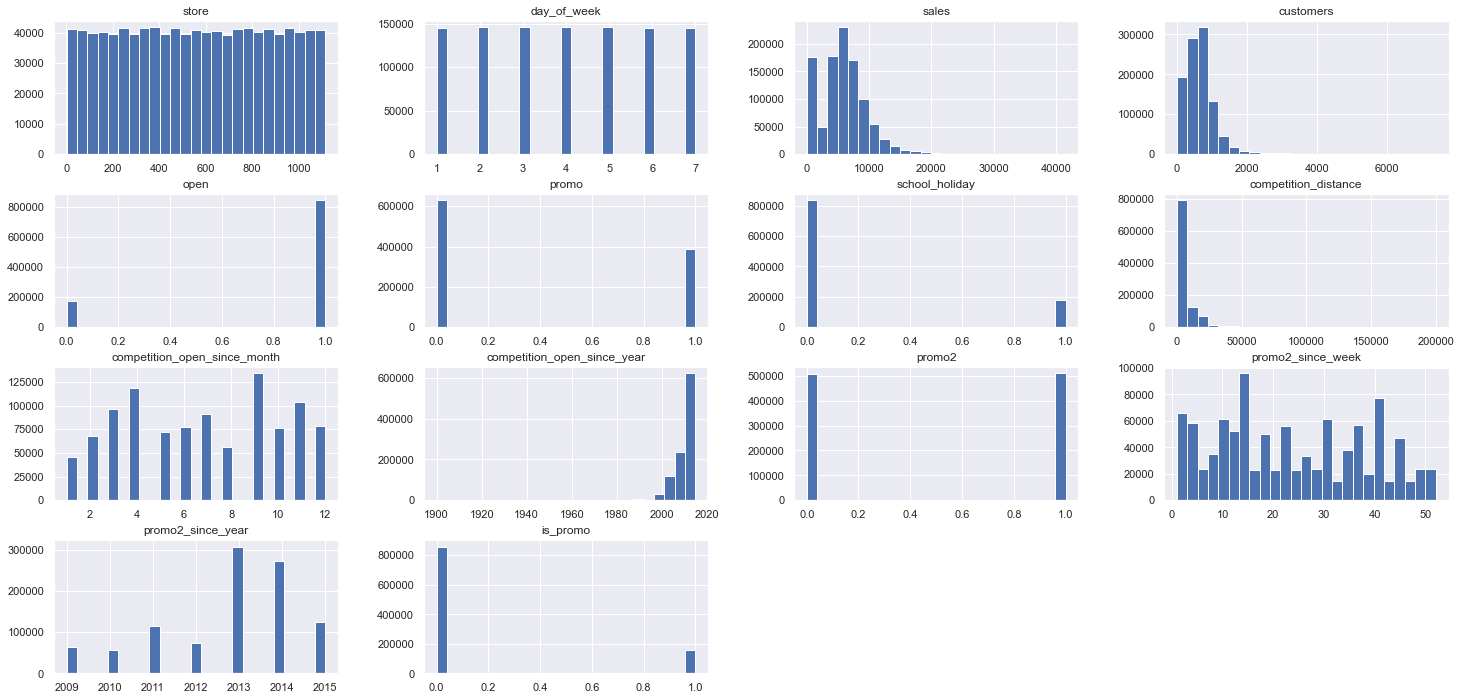

In [39]:
num_attributes.hist(bins=25);

### 4.1.3 Categorical Variable

In [41]:
cat_attibutes.head()

,state_holiday,store_type,assortment,promo_interval,month_map
0,0,c,a,0,Jul
1,0,a,a,"Jan,Apr,Jul,Oct",Jul
2,0,a,a,"Jan,Apr,Jul,Oct",Jul
3,0,c,c,0,Jul
4,0,a,a,0,Jul


In [42]:
df4['state_holiday'].drop_duplicates()

0            regular_day
63559     public_holiday
129424    easter_holiday
241126         christmas
Name: state_holiday, dtype: object

C:\Users\roxfr\anaconda3\envs\ds_em_producao\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\roxfr\anaconda3\envs\ds_em_producao\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\roxfr\anaconda3\envs\ds_em_producao\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinte

<AxesSubplot:xlabel='sales', ylabel='Density'>

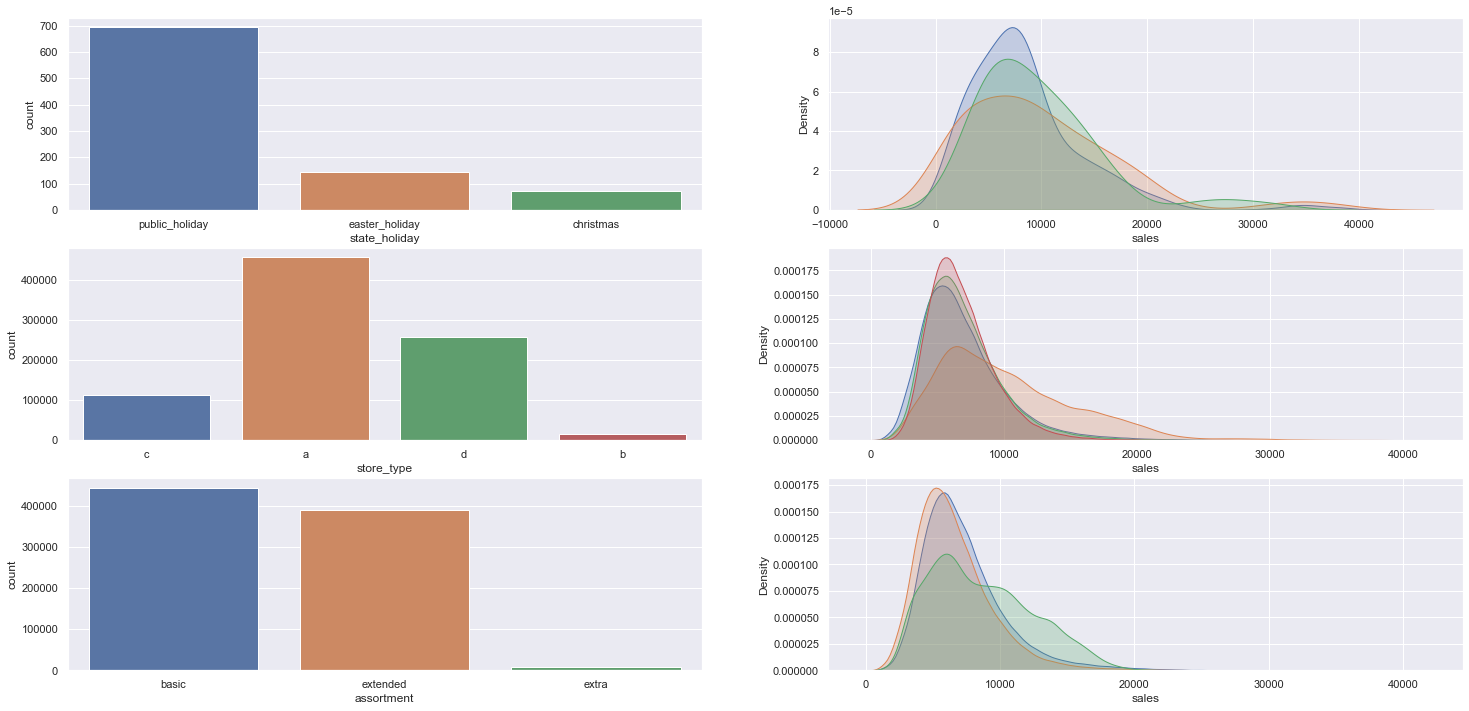

In [43]:
#state_holiday
plt.subplot(3, 2, 1)
a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot(a['state_holiday'])

plt.subplot(3, 2, 2)
sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday']['sales'], label='public_holiday', shade=True)
sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday']['sales'], label='easter_holiday', shade=True)
sns.kdeplot(df4[df4['state_holiday'] == 'christmas']['sales'], label='christmas', shade=True)

#state_type
plt.subplot(3, 2, 3)
sns.countplot(df4['store_type'])

plt.subplot(3, 2, 4)
sns.kdeplot(df4[df4['store_type'] == 'a']['sales'], label='a', shade=True)
sns.kdeplot(df4[df4['store_type'] == 'b']['sales'], label='b', shade=True)
sns.kdeplot(df4[df4['store_type'] == 'c']['sales'], label='c', shade=True)
sns.kdeplot(df4[df4['store_type'] == 'd']['sales'], label='d', shade=True)

# assortment

plt.subplot(3, 2, 5)
sns.countplot(df4['assortment'])

plt.subplot(3, 2, 6)
sns.kdeplot(df4[df4['assortment'] == 'extended']['sales'], label='extended', shade=True)
sns.kdeplot(df4[df4['assortment'] == 'basic']['sales'], label='basic', shade=True)
sns.kdeplot(df4[df4['assortment'] == 'extra']['sales'], label='extra', shade=True)




## 4.2 Analise Bivariada

### H1. Lojas com maior sortimentos deveriam vender mais.
**FALSA** Lojas com maior sortimento vendem MENOS.

<AxesSubplot:xlabel='year_week'>

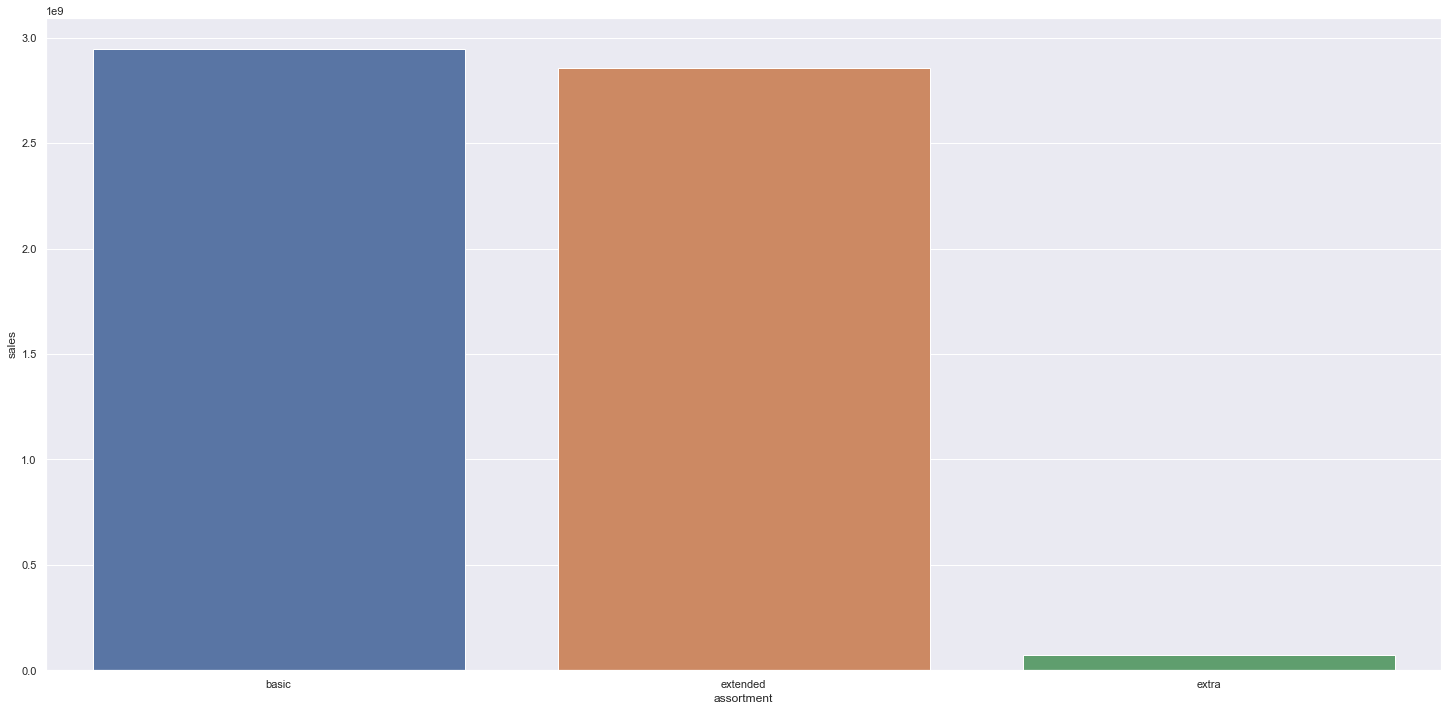

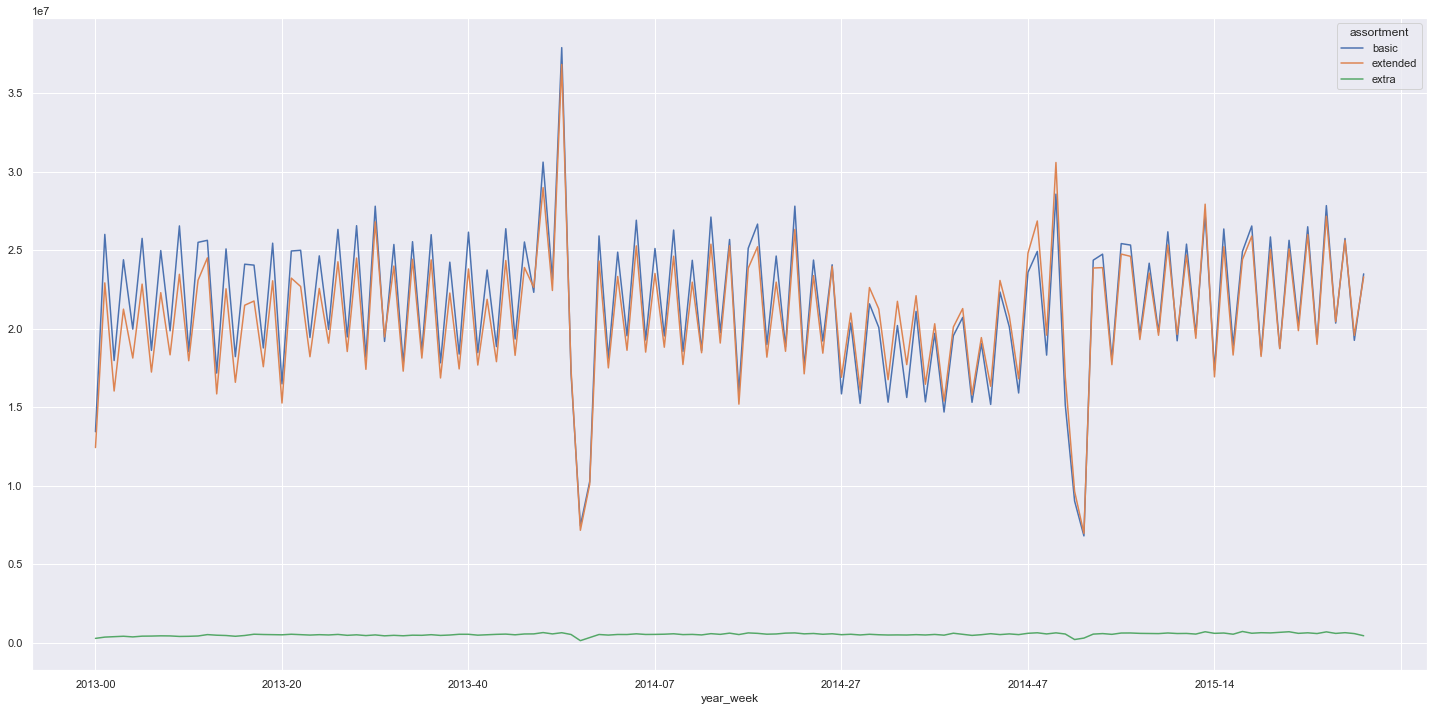

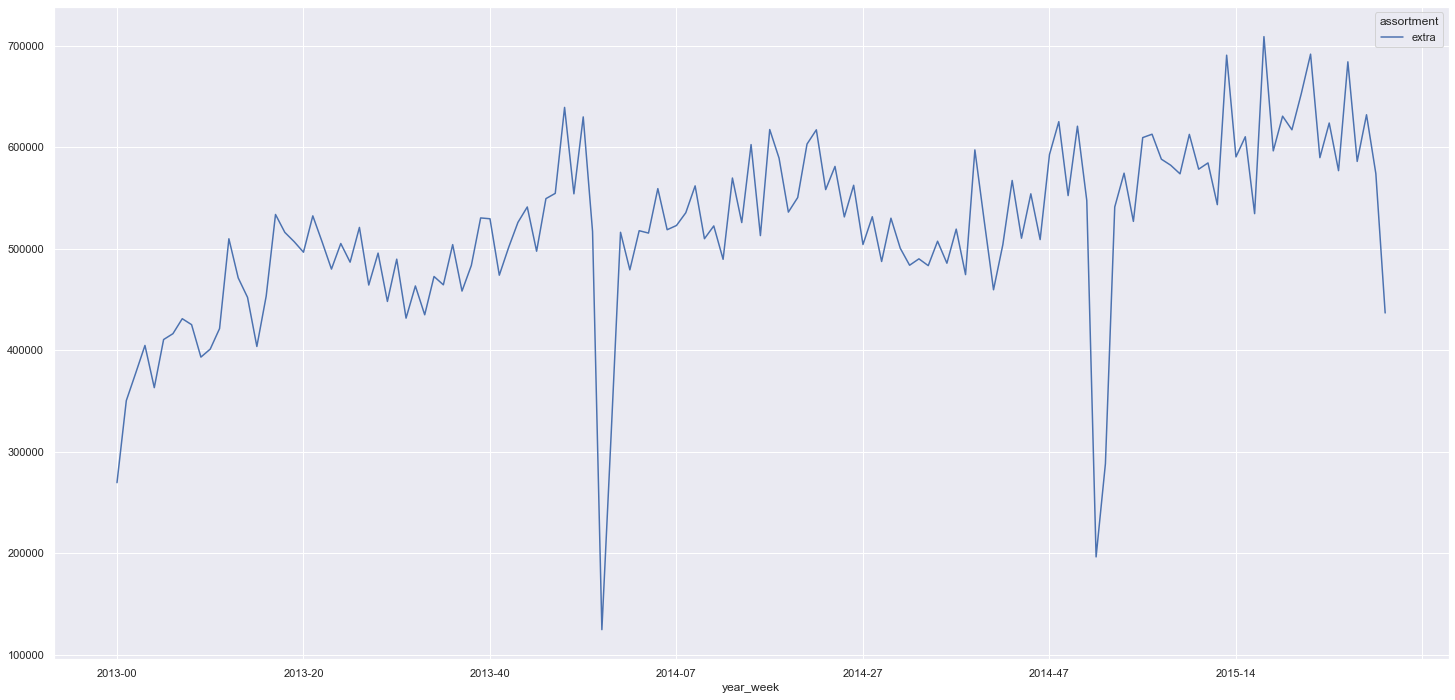

In [45]:
aux1 = df4[['assortment', 'sales']].groupby('assortment').sum().reset_index()
sns.barplot(x= 'assortment', y='sales', data=aux1);

aux2 = df4[['year_week', 'assortment', 'sales']].groupby(['year_week', 'assortment']).sum().reset_index()
aux2.pivot(index= 'year_week', columns='assortment', values='sales').plot()

#aux3.head()

aux3 = aux2[aux2['assortment'] == 'extra']
aux3.pivot(index='year_week', columns='assortment', values='sales').plot()


### H2. Lojas com competidores mais próximos deveriam vender menos.
** FALSA*** Lojas com competidores proximos vendem mais.

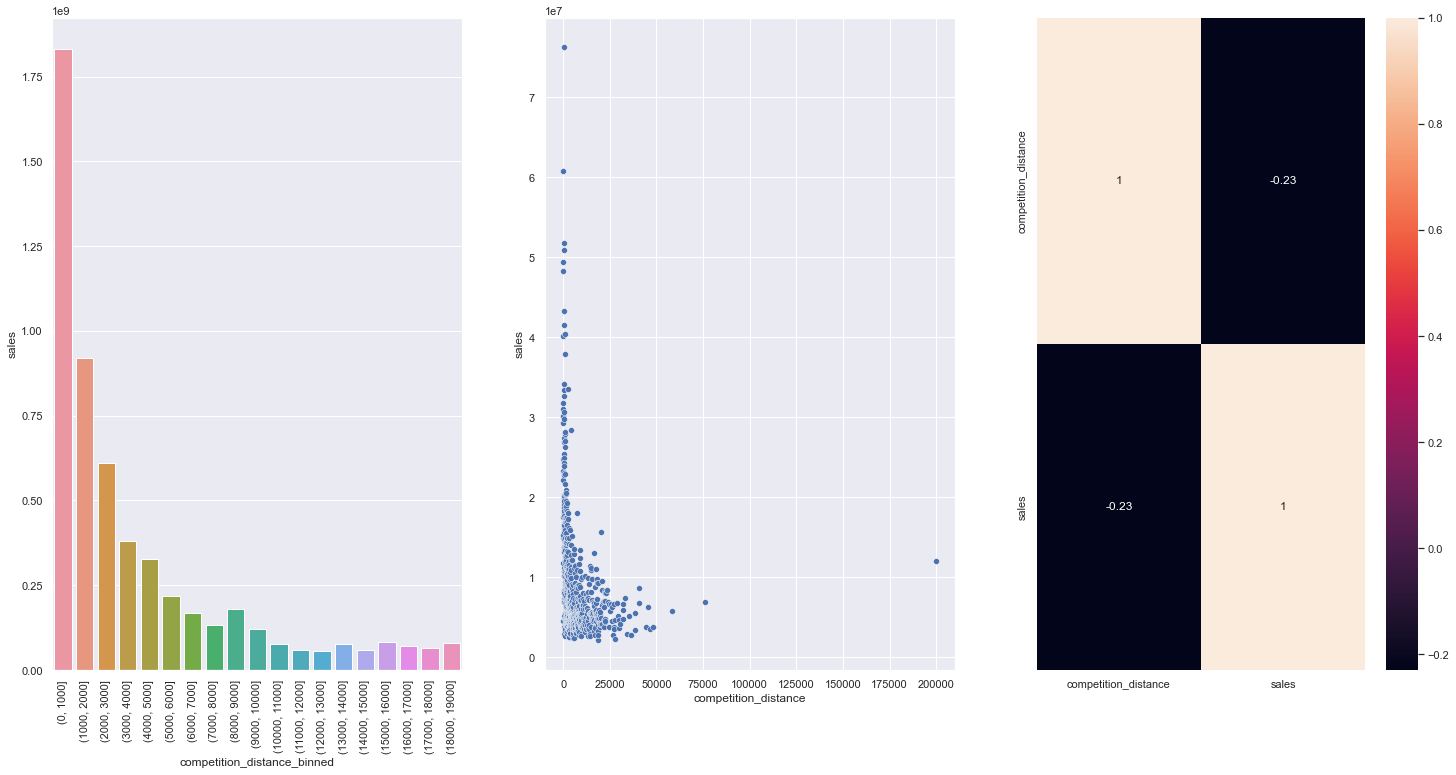

In [46]:
aux1 = df4[['competition_distance', 'sales']].groupby('competition_distance').sum().reset_index()

plt.subplot(1, 3, 1)
bins = list(np.arange(0, 20000, 1000))
aux1['competition_distance_binned'] = pd.cut(aux1['competition_distance'], bins=bins)
aux2 = aux1[['competition_distance_binned', 'sales']].groupby('competition_distance_binned').sum().reset_index()
sns.barplot(x='competition_distance_binned', y='sales', data=aux2);
plt.xticks(rotation=90);


#sns.barplot(x='competition_distance', y='sales', data=aux1);

plt.subplot(1, 3, 2)
sns.scatterplot(x ='competition_distance', y='sales', data=aux1)


plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True);


In [47]:
aux1.sample(4)

,competition_distance,sales,competition_distance_binned
488,10450.0,6504285,"(10000.0, 11000.0]"
98,1080.0,12536778,"(1000.0, 2000.0]"
73,760.0,17423583,"(0.0, 1000.0]"
639,32330.0,5871619,NaN


### H3. Lojas com competidores à mais tempo deveriam vender mais.

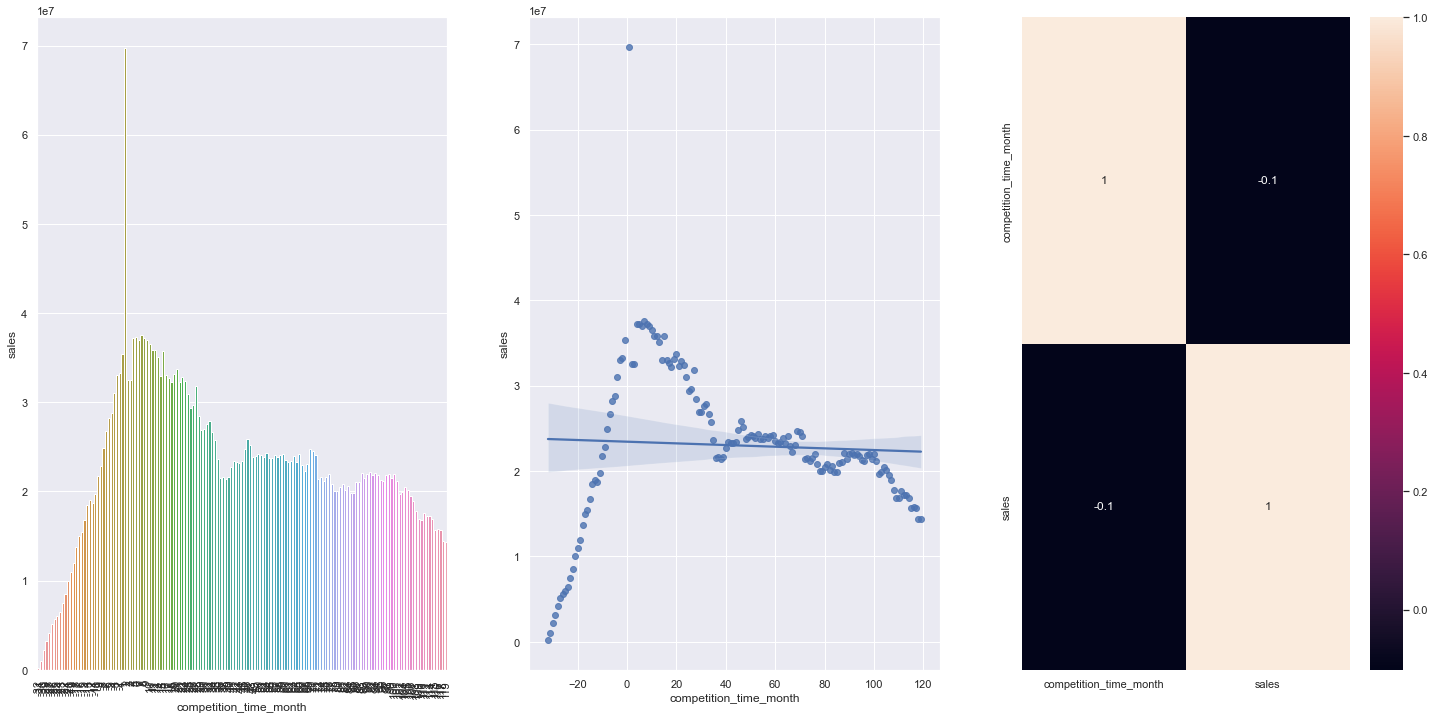

In [48]:
plt.subplot(1, 3 , 1)
aux1 = df4[['competition_time_month', 'sales']].groupby('competition_time_month').sum().reset_index()
aux2 = aux1[(aux1['competition_time_month'] < 120) & (aux1['competition_time_month']!= 0)]
sns.barplot(x='competition_time_month', y='sales', data=aux2);
plt.xticks(rotation=90);

plt.subplot(1, 3, 2)
sns.regplot(x='competition_time_month', y='sales', data=aux2);

plt.subplot(1, 3, 3)
x = sns.heatmap(aux1.corr(method='pearson'), annot=True);



### H4. Lojas com promoções ativas por mais tempo deveria vender mais.

### H5. Lojas com mais dias de promoção deveriam vender mais.

### H7. Lojas com mais promoções consecutivas deveriam vender mais.

## 4.3 Analise Multivariada